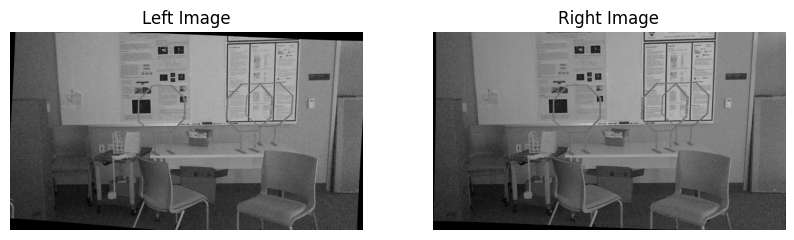

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the left and right images in grayscale
imgL = cv2.imread(r"/content/im0e0.png", cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread(r"/content/im1e0.png", cv2.IMREAD_GRAYSCALE)

# Display the stereo images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imgL, cmap='gray')
plt.title('Left Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgR, cmap='gray')
plt.title('Right Image')
plt.axis('off')
plt.show()


# Stereo BM object to compute disparity
stereo = cv2.StereoBM_create(numDisparities=160, blockSize=15)

# Compute disparity map
disparity = stereo.compute(imgL, imgR).astype(np.float32)

# Replace non-positive disparities with NaN for better handling
disparity[disparity <= 0] = np.NaN #0.1

In [35]:
70*0.5/128

0.2734375

In [28]:
imgL.shape

(1080, 1920)

In [ ]:
(240,320)

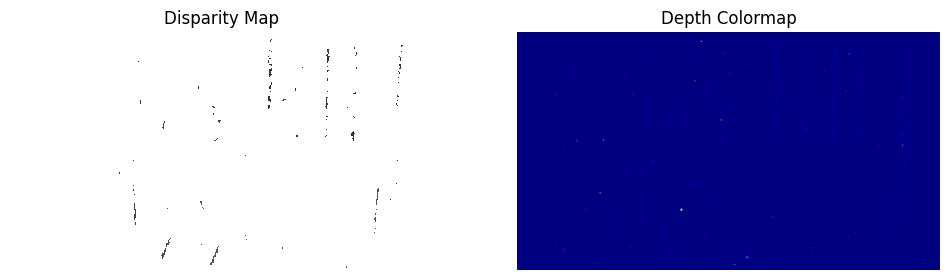

In [5]:

# Calculate depth from disparity
focal_length = 700
baseline = 0.5
depth_map = (focal_length * baseline) / disparity

# Remove NaN and infinite values
depth_map[np.isnan(depth_map)] = 0
depth_map[np.isinf(depth_map)] = 0


# Normalize and apply colormap
depth_normalized = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX)
depth_colormap = cv2.applyColorMap(np.uint8(depth_normalized), cv2.COLORMAP_JET)

# Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(disparity, cmap='gray')
plt.title('Disparity Map')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(depth_colormap, cv2.COLOR_BGR2RGB))
plt.title('Depth Colormap')
plt.axis('off')
plt.show()

In [18]:
disparity

array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]], dtype=float32)

In [19]:
type(depth_map)

numpy.ndarray

In [20]:
type(disparity)

numpy.ndarray

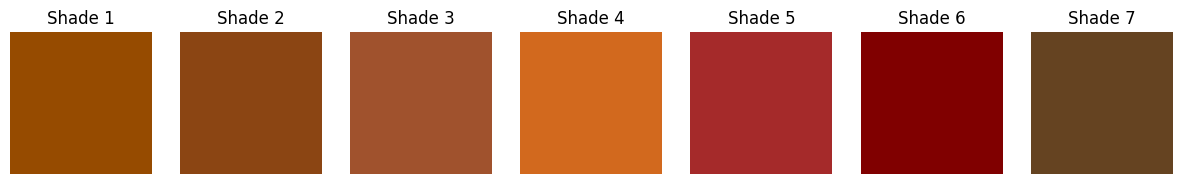

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def create_color_image(color, width=100, height=100):
    image = np.zeros((height, width, 3), dtype=np.uint8)
    image[:] = color[::-1]
    return image


brown_shades = [
    (150, 75, 0),
    (139, 69, 19),
    (160, 82, 45),
    (210, 105, 30),
    (165, 42, 42),
    (128, 0, 0),
    (101, 67, 33),
]

fig, axes = plt.subplots(1, len(brown_shades), figsize=(15, 5))
for i, color in enumerate(brown_shades):

    img = create_color_image(color)
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Shade {i+1}')

plt.show()

In [41]:
brown_shades = []
b = 30

for r in range(100,160,10):
  for g in range(45,60,10):
      brown_shades.append((r,g,b))

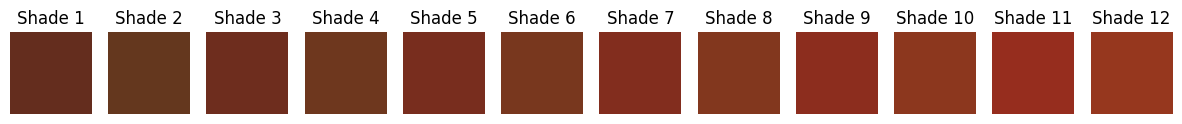

In [42]:

fig, axes = plt.subplots(1, len(brown_shades), figsize=(15, 5))
for i, color in enumerate(brown_shades):

    img = create_color_image(color)
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Shade {i+1}')

plt.show()